**توضیحات**

در اینجا دو نوع اتوانکودر را بر روی داده های دست خط میخواهیم آموزش دهیم. 

انکودری که بر شبکه ی کانولوشنالی یادگیری شده است دقت بیشتر و تلفات کمتری نسبت به شبکه ساده اولی دارد که این با شهود اولیه ما نیز سازگار است، چون در شبکه های کانولوشنالی از فیلترهای مختلفی استفاده می‌شود که مناسب یادگیری تصاویر هستند. اما شبکه های عصبی عادی آنقدری کلی تر هستند.

در قسمت آخر به ازای چهار ضریب نویز متفاوت مدل را یادگیری دادیم که شهوداً مدلی که بر اساس ضریب نویز کمتر یادگیری شده است دقت بیشتری دازد، ولی در کل توانسته ایم باز هم به خوبی تصاویر را بازسازی کنیم.

در کل دقت انکدوینگ به این روش باز هم به روش های دقیق نمیرسید و از جمله مشکلات آن این است که تصاویر باید به نوعی مشابه تصاویر دیتاست مورد یادگیری شده باشند.


In [19]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0 
x_test = x_test.astype('float32') / 255.0 
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


Epoch 1/5
235/235 [==============================] - 2s 10ms/step - loss: 0.2809 - val_loss: 0.1901
Epoch 2/5
235/235 [==============================] - 2s 10ms/step - loss: 0.1718 - val_loss: 0.1539
Epoch 3/5
235/235 [==============================] - 2s 10ms/step - loss: 0.1448 - val_loss: 0.1337
Epoch 4/5
235/235 [==============================] - 2s 10ms/step - loss: 0.1284 - val_loss: 0.1214
Epoch 5/5
235/235 [==============================] - 2s 10ms/step - loss: 0.1178 - val_loss: 0.1124


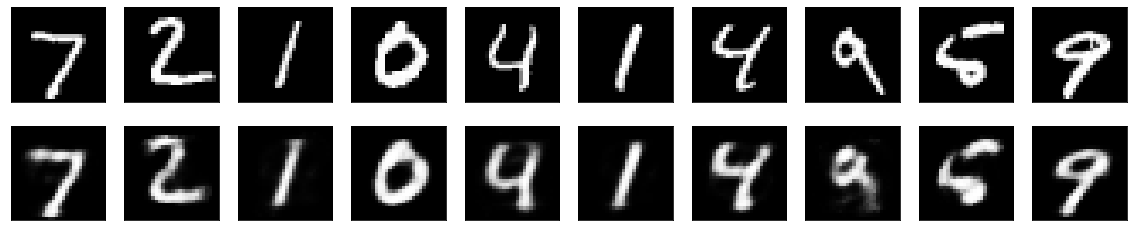

In [20]:
import keras
from keras import layers

encoding_dim = 32
input_img = keras.Input(shape=(784,))

encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)
encoder = keras.Model(input_img, encoded)
encoded_input = keras.Input(shape=(32,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Epoch 1/10
235/235 [==============================] - 79s 338ms/step - loss: 0.2692 - acc: 0.7956 - val_loss: 0.1718 - val_acc: 0.7944
Epoch 2/10
235/235 [==============================] - 79s 335ms/step - loss: 0.1554 - acc: 0.8002 - val_loss: 0.1413 - val_acc: 0.8028
Epoch 3/10
235/235 [==============================] - 80s 341ms/step - loss: 0.1364 - acc: 0.8054 - val_loss: 0.1300 - val_acc: 0.8067
Epoch 4/10
235/235 [==============================] - 80s 341ms/step - loss: 0.1275 - acc: 0.8073 - val_loss: 0.1228 - val_acc: 0.8073
Epoch 5/10
235/235 [==============================] - 89s 380ms/step - loss: 0.1218 - acc: 0.8085 - val_loss: 0.1182 - val_acc: 0.8084
Epoch 6/10
235/235 [==============================] - 80s 340ms/step - loss: 0.1179 - acc: 0.8092 - val_loss: 0.1152 - val_acc: 0.8092
Epoch 7/10
235/235 [==============================] - 80s 341ms/step - loss: 0.1150 - acc: 0.8097 - val_loss: 0.1129 - val_acc: 0.8088
Epoch 8/10
235/235 [==============================] - 8

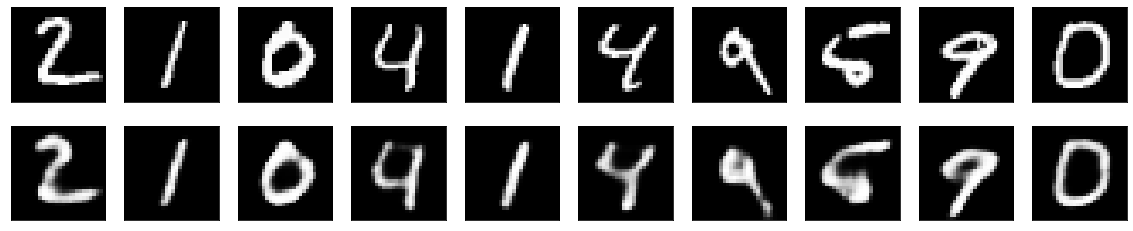

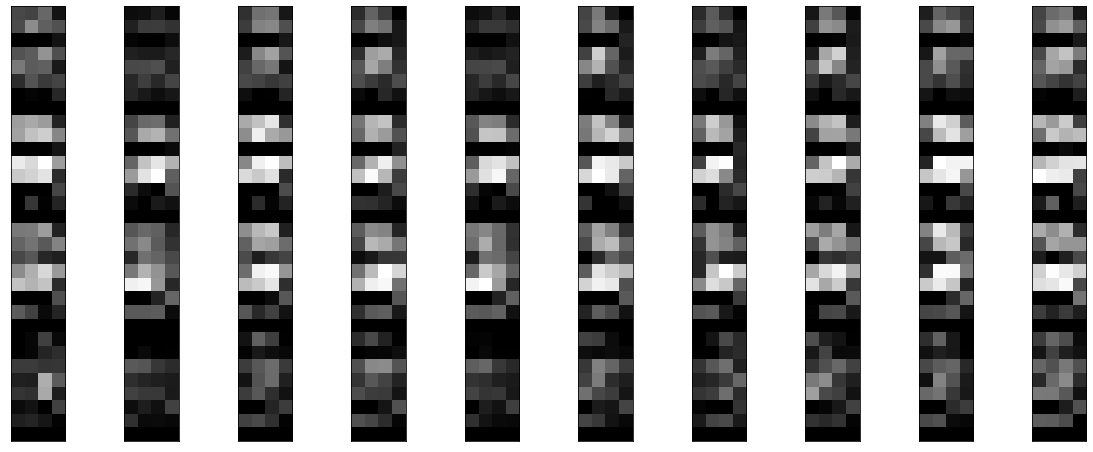

In [3]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)


x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics='acc')
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

noise factor = 0.1
469/469 [==============================] - 158s 338ms/step - loss: 0.1227 - acc: 0.8104 - val_loss: 0.0788 - val_acc: 0.8138


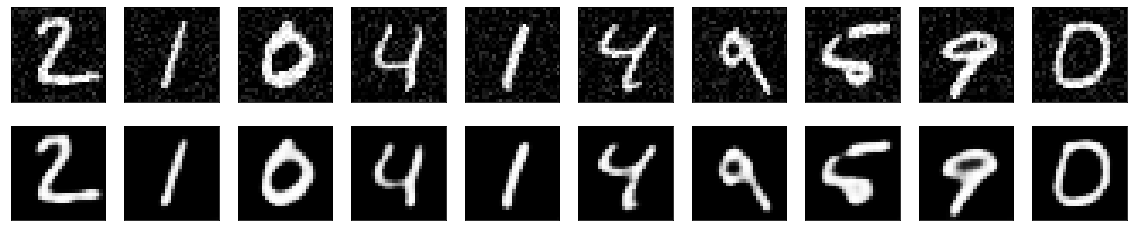

noise factor = 0.25
469/469 [==============================] - 159s 339ms/step - loss: 0.1407 - acc: 0.8105 - val_loss: 0.0895 - val_acc: 0.8128


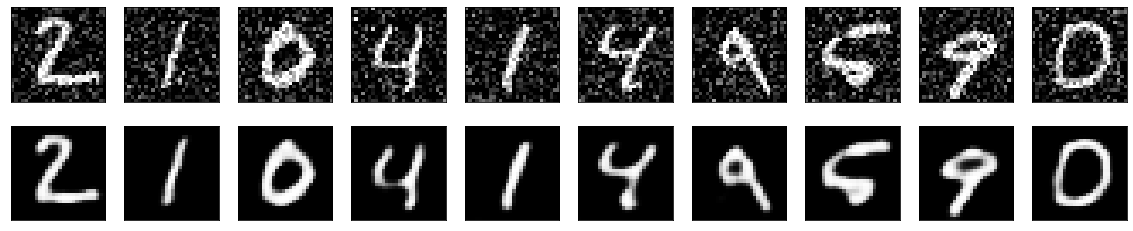

noise factor = 0.5
469/469 [==============================] - 159s 338ms/step - loss: 0.1598 - acc: 0.8074 - val_loss: 0.1153 - val_acc: 0.8106


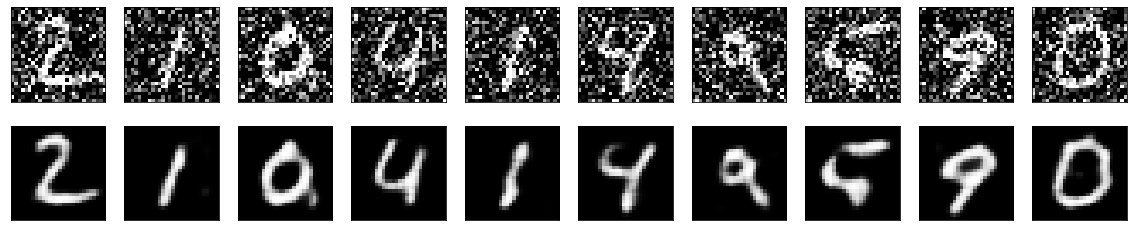

noise factor = 0.8
469/469 [==============================] - 160s 341ms/step - loss: 0.1989 - acc: 0.8013 - val_loss: 0.1590 - val_acc: 0.8041


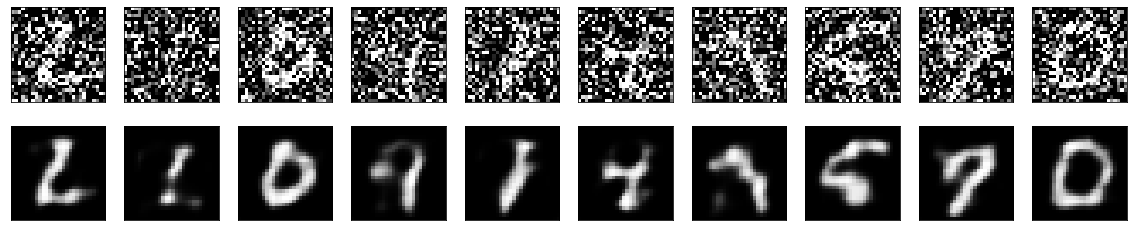

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


noise_factors = [0.1,0.25,0.5,0.8]
for noise_factor in noise_factors:
  x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
  x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

  x_train_noisy = np.clip(x_train_noisy, 0., 1.)
  x_test_noisy = np.clip(x_test_noisy, 0., 1.)
  
  input_img = keras.Input(shape=(28, 28, 1))

  x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
  x = layers.MaxPooling2D((2, 2), padding='same')(x)
  x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
  encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

  # At this point the representation is (7, 7, 32)

  x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
  x = layers.UpSampling2D((2, 2))(x)
  x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
  x = layers.UpSampling2D((2, 2))(x)
  decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

  autoencoder = keras.Model(input_img, decoded)
  print('noise factor = '+ str(noise_factor))
  autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics='acc')
  autoencoder.fit(x_train_noisy, x_train,
                  epochs=1,
                  batch_size=128,
                  shuffle=True,
                  validation_data=(x_test_noisy, x_test))
  decoded_imgs = autoencoder.predict(x_test_noisy) 
  n = 10
  plt.figure(figsize=(20, 4))
  for i in range(1, n + 1):
      # Display original
      ax = plt.subplot(2, n, i)
      plt.imshow(x_test_noisy[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
      # Display reconstruction
      ax = plt.subplot(2, n, i + n)
      plt.imshow(decoded_imgs[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()